Airbnb, Inc. adalah perusahaan Amerika yang mengoperasikan pasar online untuk penginapan, terutama homestay untuk persewaan liburan, dan aktivitas pariwisata. Berbasis di San Francisco, California, platform ini dapat diakses melalui situs web dan aplikasi seluler.

In [1]:
import pandas as pd
link_dataset = 'https://drive.google.com/u/1/uc?id=1CSyGmkDqLIdToDtOD_rkv_7VI-OxaO8a&export=download'
df = pd.read_csv(link_dataset)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# cek data kosong
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
df = df.drop(['id','name','host_id','host_name','latitude','longitude','last_review','availability_365','calculated_host_listings_count','minimum_nights'],axis=1)
df.fillna({'reviews_per_month':0}, inplace=True)

In [6]:
df.tail()

,neighbourhood_group,neighbourhood,room_type,price,number_of_reviews,reviews_per_month
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,0,0.0
48891,Brooklyn,Bushwick,Private room,40,0,0.0
48892,Manhattan,Harlem,Entire home/apt,115,0,0.0
48893,Manhattan,Hell's Kitchen,Shared room,55,0,0.0
48894,Manhattan,Hell's Kitchen,Private room,90,0,0.0


price                   AxesSubplot(0.125,0.125;0.227941x0.755)
number_of_reviews    AxesSubplot(0.398529,0.125;0.227941x0.755)
reviews_per_month    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

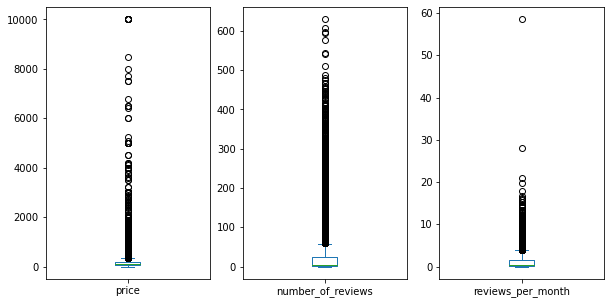

In [7]:
df.plot(kind="box", subplots=True, layout=(1,3), figsize=(10,5))

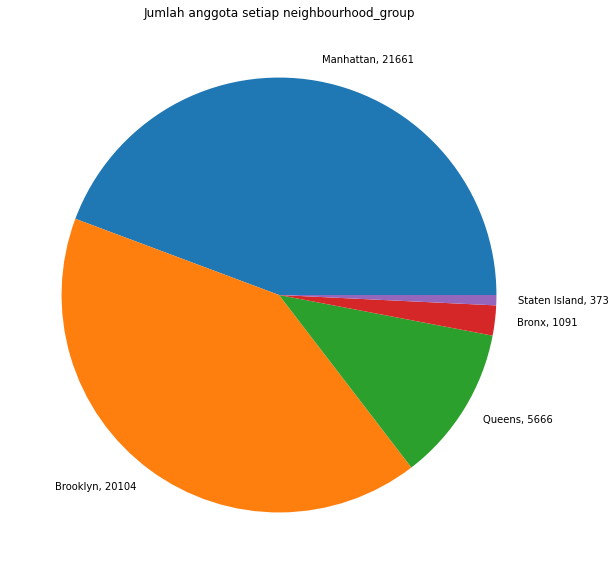

In [8]:
ng = df.neighbourhood_group.value_counts()
labels = [f'{i}, {j}' for i,j in zip(ng.index,ng.values)]
fig, ax= plt.subplots(figsize=(10,10))
plt.title('Jumlah anggota setiap neighbourhood_group')
plt.pie(ng.values, labels=labels)
fig.set_facecolor('white')
plt.show()

<AxesSubplot:xlabel='price', ylabel='reviews_per_month'>

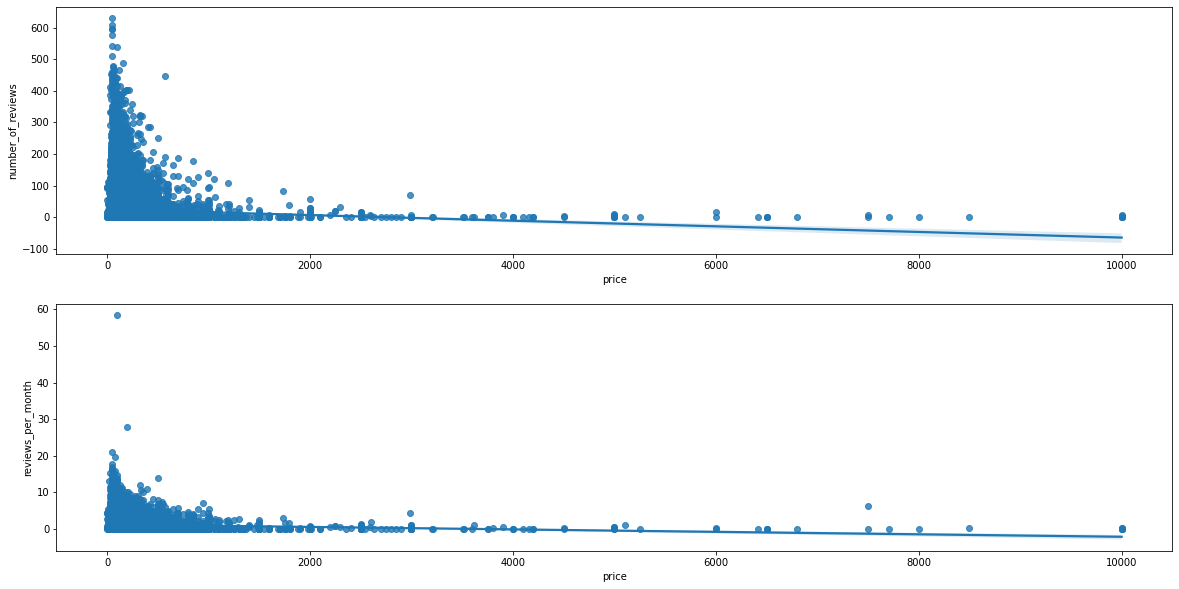

In [9]:
# relasi harga dengan jumlah review
fig, ax= plt.subplots(2,1,figsize=(20,10))
sns.regplot(data=df,ax=ax[0],y='number_of_reviews',x='price')
sns.regplot(data=df,ax=ax[1],y='reviews_per_month',x='price')

In [10]:
neighbourhood_mean = []
for neigh in df.neighbourhood.unique():
    desc = df.loc[df.neighbourhood == neigh].describe().loc['mean']
    neighbourhood_mean.append({'neighbourhood':neigh,'price':desc['price'],'review':desc['number_of_reviews']})

In [18]:
neighbourhood_mean_df = pd.DataFrame(neighbourhood_mean)
neighbourhood_mean_df.sort_values('review',ascending=False,inplace=True)
top10Review = neighbourhood_mean_df.head(10)

<AxesSubplot:title={'center':'Top 10 neighbourhood yang paling banyak di review'}, xlabel='review', ylabel='neighbourhood'>

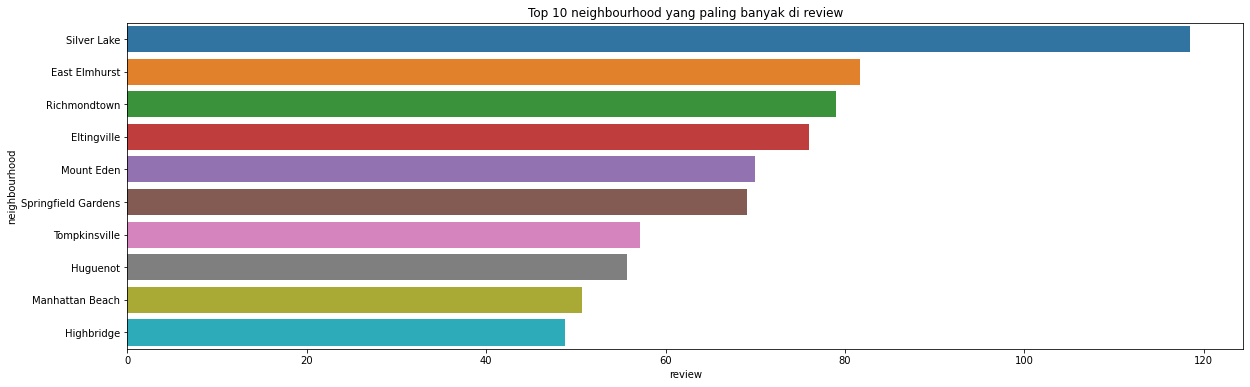

In [20]:
plt.figure(figsize=(20,6))
plt.title("Top 10 neighbourhood yang paling banyak di review")
sns.barplot(x='review', y='neighbourhood', data=top10Review)